# 北京租房数据分析
- 数据来源: ./data/链家北京租房数据.csv
- 数据量: 5773条
- 索引列: 区域 | 小区名称 | 户型 | 面积(㎡) | 价格(元/月) | 位置

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.sans-serif'] = 'SimHei'  # 'SimHei'   STKaiti

plt.rc("font",family='MicroSoft YaHei',weight='bold')

## 读取数据

In [2]:
data = pd.read_csv('./data/链家北京租房数据.csv', engine='python', encoding='utf-8')
print(data.shape)
data

(5773, 7)


,Unnamed: 0,区域,小区名称,户型,面积(㎡),价格(元/月),位置
0,0,东城,万国城MOMA,1室0厅,59.11,10000,北京市东城区万国城MOMA
1,1,东城,北官厅胡同2号院,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院
2,2,东城,和平里三区,1室1厅,40.57,6900,北京市东城区和平里三区
3,3,东城,菊儿胡同,2室1厅,57.09,8000,北京市东城区菊儿胡同
4,4,东城,交道口北二条35号院,1室1厅,42.67,5500,北京市东城区交道口北二条35号院
...,...,...,...,...,...,...,...
5768,8218,顺义,怡馨家园,3室1厅,114.03,5500,北京市顺义区怡馨家园
5769,8219,顺义,旭辉26街区,4室2卫,59.00,5000,北京市顺义区旭辉26街区
5770,8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800,北京市顺义区前进花园玉兰苑
5771,8221,顺义,双裕小区,2室1厅,71.81,4200,北京市顺义区双裕小区


- 删除Unnamed: 0列

In [3]:
del data['Unnamed: 0']
data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月),位置
0,东城,万国城MOMA,1室0厅,59.11,10000,北京市东城区万国城MOMA
1,东城,北官厅胡同2号院,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院
2,东城,和平里三区,1室1厅,40.57,6900,北京市东城区和平里三区
3,东城,菊儿胡同,2室1厅,57.09,8000,北京市东城区菊儿胡同
4,东城,交道口北二条35号院,1室1厅,42.67,5500,北京市东城区交道口北二条35号院


- 查看数据类型

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   区域       5773 non-null   object 
 1   小区名称     5773 non-null   object 
 2   户型       5773 non-null   object 
 3   面积(㎡)    5773 non-null   float64
 4   价格(元/月)  5773 non-null   int64  
 5   位置       5773 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 270.7+ KB


- 去除重复列与空值

In [5]:
data = data.drop_duplicates(keep='first')  # 去除重复行
data = data.dropna()  # 去除空值
data.shape

(5773, 6)

## 数据分析

### 1. 以区域分组计算每个数据的数量

In [6]:
# 创建一个新表
df_area_count = pd.DataFrame(columns={'区域', '房屋数量'})
df_area_count

,区域,房屋数量


findfont: Font family ['MicroSoft YaHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['MicroSoft YaHei'] not found. Falling back to DejaVu Sans.


区域
朝阳       1597
海淀        605
丰台        577
通州        477
西城        442
大兴        362
昌平        347
顺义        297
门头沟       285
东城        282
房山        180
石景山       175
亦庄开发区     147
Name: 区域, dtype: int64


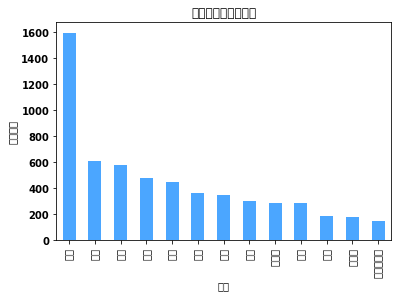

In [26]:
# 通过groupby分组获取房屋数量
df_area_count_gb = data.groupby('区域')['区域'].count().sort_values( ascending=False)
print(df_area_count_gb)
df_area_count_gb.plot(kind='bar', color='dodgerblue', alpha=0.8, ylabel='房屋数量', title='不同区域的房屋数量')
plt.show()

In [10]:
# 将groupby数据传递到d_count
df_area_count['区域'] = df_area_count_gb.index
df_area_count['房屋数量'] = df_area_count_gb.values
df_area_count


,区域,房屋数量
0,朝阳,1597
1,海淀,605
2,丰台,577
3,通州,477
4,西城,442
5,大兴,362
6,昌平,347
7,顺义,297
8,门头沟,285
9,东城,282


### 2. 户型数量分析
- 将户型做一个分类统计，并筛选出户型数量大于50的数据

In [11]:
df_housetype_count = pd.DataFrame(columns=['户型', '户型数量'])
df_housetype_count

,户型,户型数量


户型
2室1厅    2249
1室1厅     844
3室1厅     766
3室2厅     489
2室2厅     265
1室0厅     244
4室2厅     191
1室1卫     126
2室1卫     120
3室1卫      92
4室1厅      58
5室2厅      49
3室2卫      48
4室2卫      24
5室3厅      24
2室0厅      23
2室2卫      22
4室1卫      15
1室2厅      13
3室0厅      12
3室3厅      10
1室0卫      10
4室3厅       9
5室2卫       7
5室1厅       7
6室3厅       6
6室2厅       5
4室3卫       5
5室1卫       3
5室3卫       3
3室0卫       3
7室3厅       3
9室5厅       2
6室3卫       2
4室5厅       2
9室1厅       2
8室4厅       2
7室2厅       2
6室4卫       2
3室3卫       1
7室4厅       1
7室1厅       1
2室0卫       1
6室1厅       1
9室2厅       1
6室1卫       1
6室0厅       1
2室3厅       1
5室5厅       1
5室4厅       1
5室0厅       1
5室0卫       1
0室0厅       1
Name: 户型, dtype: int64


<AxesSubplot:title={'center':'不同户型的房屋数量(>50)'}, xlabel='户型', ylabel='户型数量'>

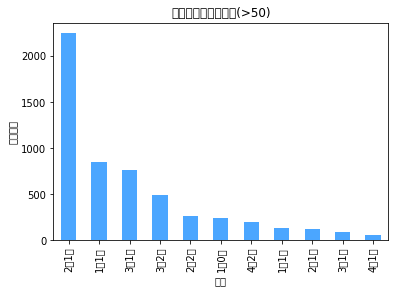

In [12]:
# 通过groupby分组获取房屋数量
df_housetype_count_gb = data.groupby('户型')['户型'].count().sort_values(ascending=False)
print(df_housetype_count_gb)
df_housetype_count_gb[df_housetype_count_gb.values > 50].plot(kind='bar', color='dodgerblue', alpha=0.8, ylabel='户型数量', title='不同户型的房屋数量(>50)')

In [13]:
df_housetype_count['户型'] = df_housetype_count_gb.index
df_housetype_count['户型数量'] = df_housetype_count_gb.values
df_housetype_count = df_housetype_count[df_housetype_count['户型数量'] > 50]
df_housetype_count

,户型,户型数量
0,2室1厅,2249
1,1室1厅,844
2,3室1厅,766
3,3室2厅,489
4,2室2厅,265
5,1室0厅,244
6,4室2厅,191
7,1室1卫,126
8,2室1卫,120
9,3室1卫,92


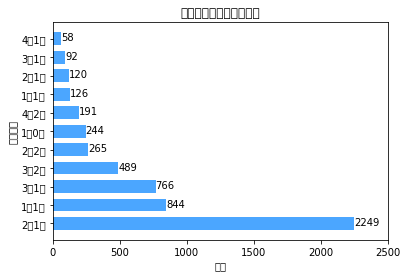

In [15]:
# 可视化横轴展示
plt.barh(range(11),  df_housetype_count['户型数量'], height=0.7, color='dodgerblue', alpha=0.8)
plt.yticks(range(11), df_housetype_count['户型'])
plt.xlim(0, 2500)
plt.xlabel('数量')
plt.ylabel('户型种类')
plt.title('北京地区各户型房屋数量')
for x, y in enumerate(df_housetype_count['户型数量']):
    plt.text(y+0.3, x-0.1, '%0.f'%y)
plt.show()

- 从图中可以发现两室一厅的房屋数量最多，是大部分租房户的刚需。

## 3. 各区域平均租金分析

In [ ]:
# 平均租金 = 租金总额/面积总额
sum_price = data.groupby('区域')['价格(元/月)'].sum()
sum_area = data.groupby('区域')['面积(㎡)'].sum()
df_area_price = pd.DataFrame(columns=['区域','总金额','总面积','平均租金(元)'])
